# Analysis original dataset

Authors:
- Joana Simões, n.º 2019217013
- Tomás Ferreira, n.º 2019224786

Este notebook contém a análise feita aos dataset original. Esta análise difere da anterio feita na meta 1 do projeto uma vez que na altura não se tinha noção de alguns pontos do projeto, e a análise feita anteriomente era dificil de reproduzir os os dados anonimizados gerados neste segunda meta.

In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [48]:
data_path = os.path.join('dataset', 'infringement_dataset copy.csv')

In [49]:
# load dataset
data = pd.read_csv(data_path, low_memory=False)

In [50]:
# remove rows with missing values
data = data.dropna()

## Analyse past columns

In [51]:
past_selected_columns = ['infringed']
for column in data.columns:
    if column.startswith('past'):
        past_selected_columns.append(column)

In [52]:
past_data = data[past_selected_columns]

### Correlation between past credit application and infringement

In [53]:
past_correlation_all = past_data.corr()

Text(0.5, 1.0, 'Correlation between past credit applications info and infringements')

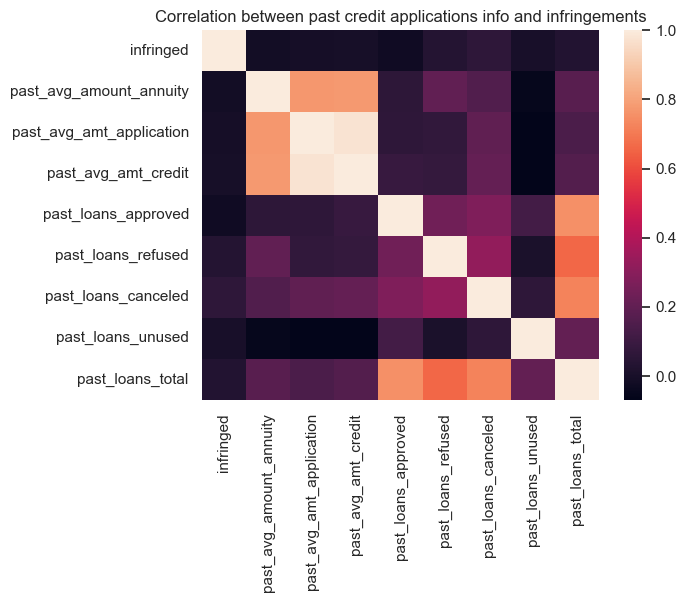

In [54]:
plt.figure()
sns.heatmap(past_correlation_all,
    xticklabels=past_correlation_all.columns,
    yticklabels=past_correlation_all.columns,
)
plt.title('Correlation between past credit applications info and infringements')

Como se pode observar, e à semelhança da análise feita com o dataset original, a correlação entre antigos empréstimos e o facto de existir um infringement ou não, é praticamente nula. No entanto, de toda a informação, é possível oobervar que quantos mais empréstimos foram cancelados no passado, maior é a probabilidade de haver um infringement agora.

In [55]:
past_amt = []
for col in past_selected_columns:
    if col.startswith('past_avg'):
        past_amt.append(col)

In [56]:
past_amt_mean_infringed = pd.DataFrame(data[data.infringed == True][past_amt].mean())
past_amt_mean_not_infringed = pd.DataFrame(data[data.infringed == False][past_amt].mean())

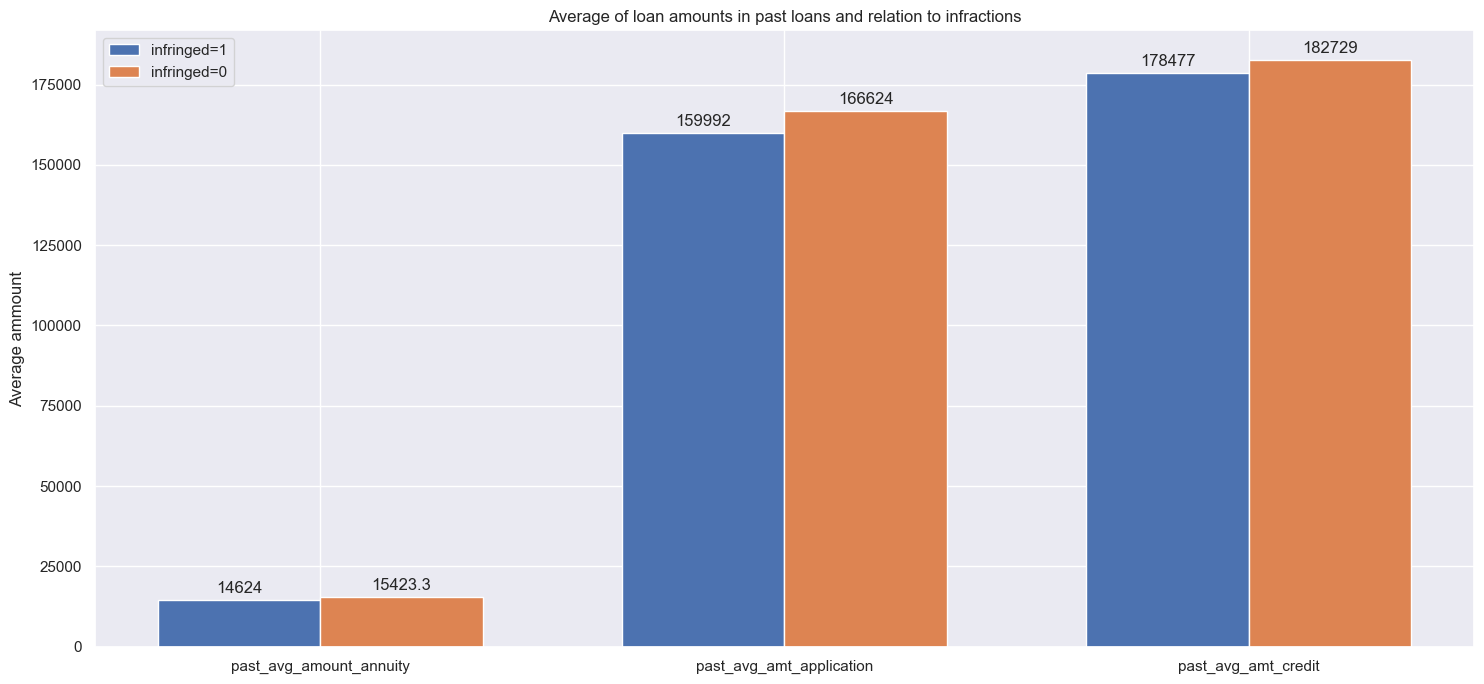

In [57]:
x = np.arange(len(past_amt_mean_infringed.index))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(15, 7))
rects1 = ax.bar(x - width/2, past_amt_mean_infringed[0], width, label='infringed=1')
rects2 = ax.bar(x + width/2, past_amt_mean_not_infringed[0], width, label='infringed=0')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average ammount')
ax.set_title('Average of loan amounts in past loans and relation to infractions')
ax.set_xticks(x, labels=list(past_amt_mean_infringed.index))
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

In [58]:
past_loans = []
for col in past_selected_columns:
    if col.startswith('past_loans'):
        past_loans.append(col)

In [59]:
past_loans_mean_infringed = pd.DataFrame(data[data.infringed == True][past_loans].mean())
past_loans_mean_not_infringed = pd.DataFrame(data[data.infringed == False][past_loans].mean())

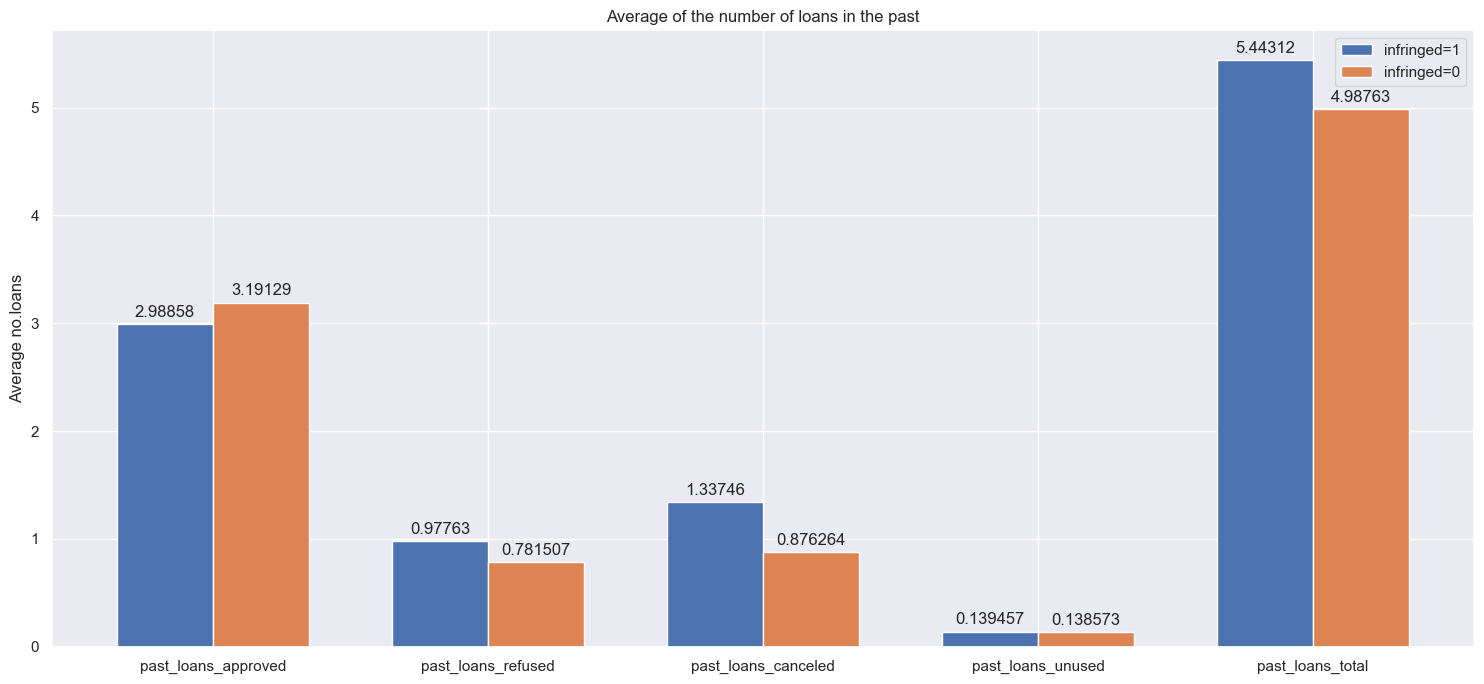

In [60]:
x = np.arange(len(past_loans_mean_infringed.index))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(15, 7))
rects1 = ax.bar(x - width/2, past_loans_mean_infringed[0], width, label='infringed=1')
rects2 = ax.bar(x + width/2, past_loans_mean_not_infringed[0], width, label='infringed=0')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average no.loans')
ax.set_title('Average of the number of loans in the past')
ax.set_xticks(x, labels=list(past_loans_mean_infringed.index))
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

In [61]:
diffs = past_loans_mean_not_infringed - past_loans_mean_infringed

In [62]:
diffs.index[np.argmax(np.abs(diffs[0]))]

'past_loans_canceled'

## Analyse personas

Text(0.5, 1.0, 'Histogram with the distribution of ages of people')

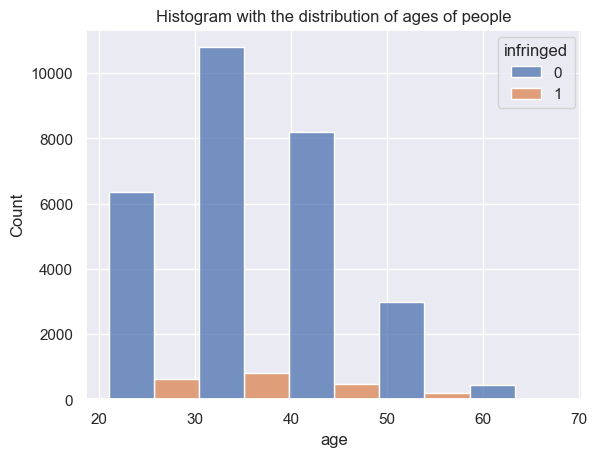

In [63]:
plt.figure()
sns.set()
sns.histplot(data=data, x='age', hue='infringed', multiple="dodge", bins=5)
plt.title('Histogram with the distribution of ages of people')

Como se pode observar pela distribuição das idades, a maior parte das pessoas que pediram empréstimos têm entre 20 e 50 anos, sendo o máximo, quando as pessoas têm entre 30 a 40 anos. É ainda possivel observar que pessoas com isdades entre os 40 e os 50 anos, pedem mais empréstimos que pessoas entre os 20 e os 30 anos, no entanto cometem menos infrações que as pessoas mais novas.

In [75]:
data.columns

Index(['loan_id', 'infringed', 'contract_type', 'gender', 'has_own_car',
       'has_own_realty', 'num_children', 'annual_income', 'credit_amount',
       'credit_annuity', 'goods_valuation', 'income_type', 'education',
       'family_status', 'housing_type', 'age', 'days_employed', 'car_age',
       'provided_mobilephone', 'provided_workphone', 'provided_homephone',
       'mobilephone_reachable', 'provided_email', 'occupation_type',
       'num_family_members', 'region_rating', 'organization_type',
       'score_ext_1', 'score_ext_2', 'score_ext_3', 'appendix_a', 'appendix_b',
       'appendix_c', 'appendix_d', 'appendix_e', 'appendix_f', 'appendix_g',
       'appendix_h', 'appendix_i', 'appendix_j', 'appendix_k', 'appendix_l',
       'appendix_m', 'appendix_n', 'appendix_o', 'appendix_p', 'appendix_q',
       'appendix_r', 'appendix_s', 'appendix_t', 'num_req_bureau_hour',
       'num_req_bureau_day', 'num_req_bureau_week', 'num_req_bureau_month',
       'num_req_bureau_qrt', 'num_r

Text(0.5, 1.0, 'Histogram with the distribution of gender of people')

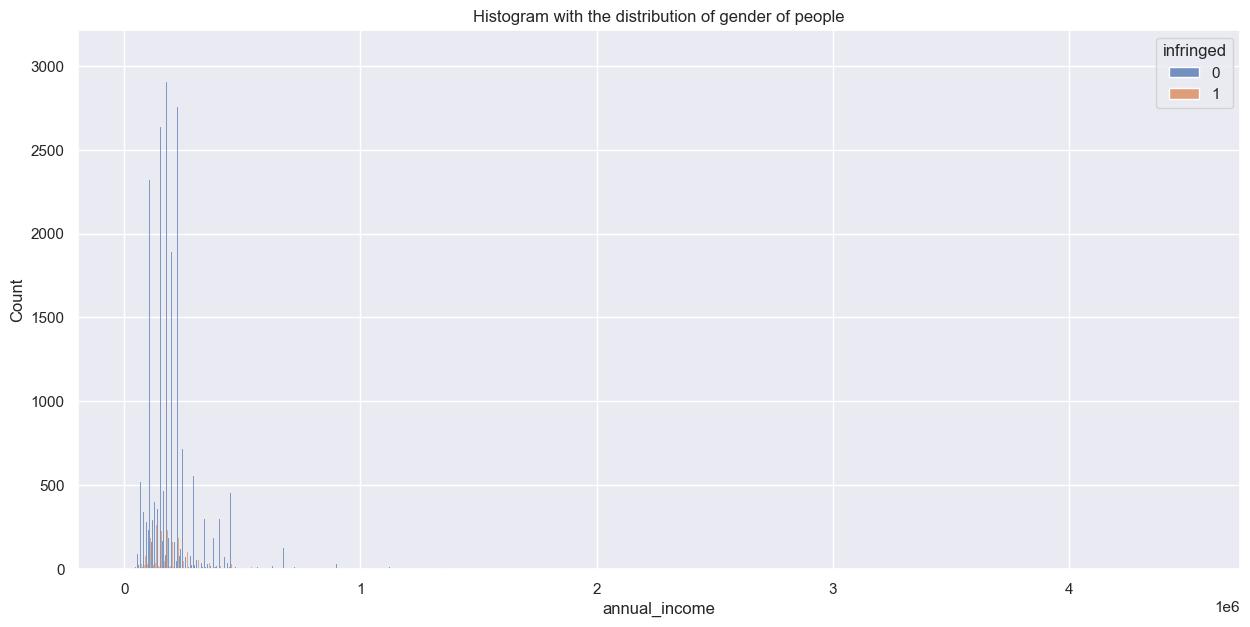

In [82]:
plt.figure(figsize=(15, 7))
sns.set()
sns.histplot(data=data, x='annual_income', hue='infringed', multiple="dodge")
plt.title('Histogram with the distribution of annual income of people')

Text(0.5, 1.0, 'Histogram with the distribution of credit annuity of people')

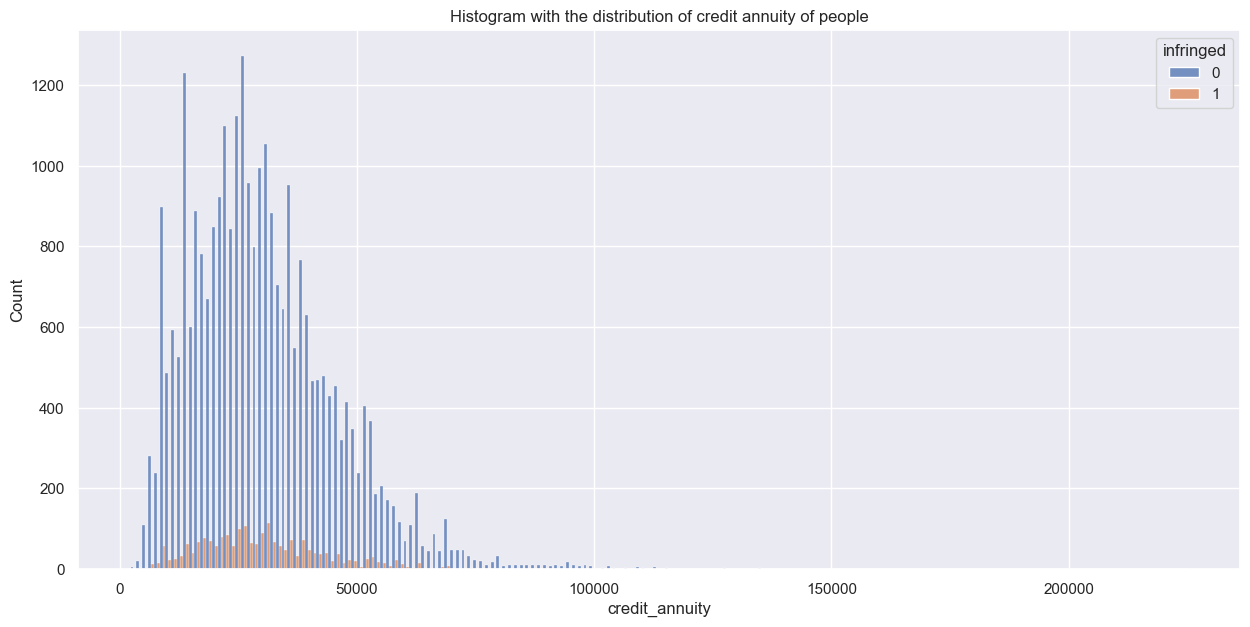

In [83]:
plt.figure(figsize=(15, 7))
sns.set()
sns.histplot(data=data, x='credit_annuity', hue='infringed', multiple="dodge")
plt.title('Histogram with the distribution of credit annuity of people')

Text(0.5, 1.0, 'Histogram with the distribution of gender of people')

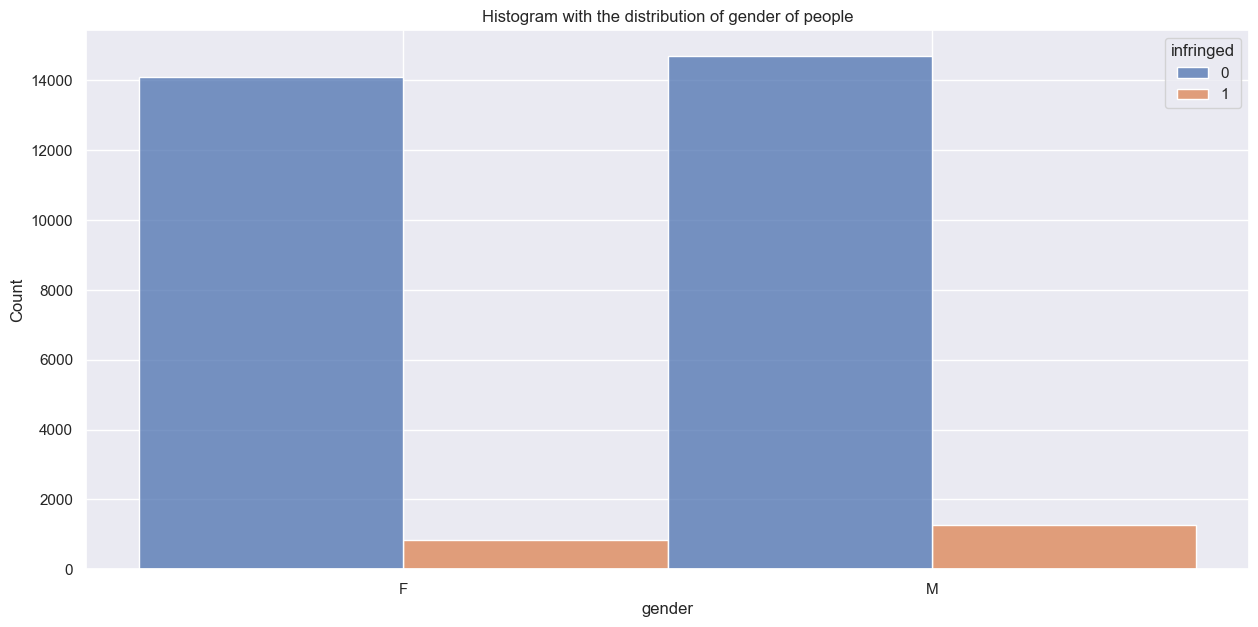

In [64]:
plt.figure(figsize=(15, 7))
sns.set()
sns.histplot(data=data, x='gender', hue='infringed', multiple="dodge")
plt.title('Histogram with the distribution of gender of people')

In [65]:
data.income_type.value_counts()

Working                 19160
Commercial associate     9004
State servant            2715
Student                     1
Name: income_type, dtype: int64

Text(0.5, 1.0, 'Histogram with the distribution of income type of people')

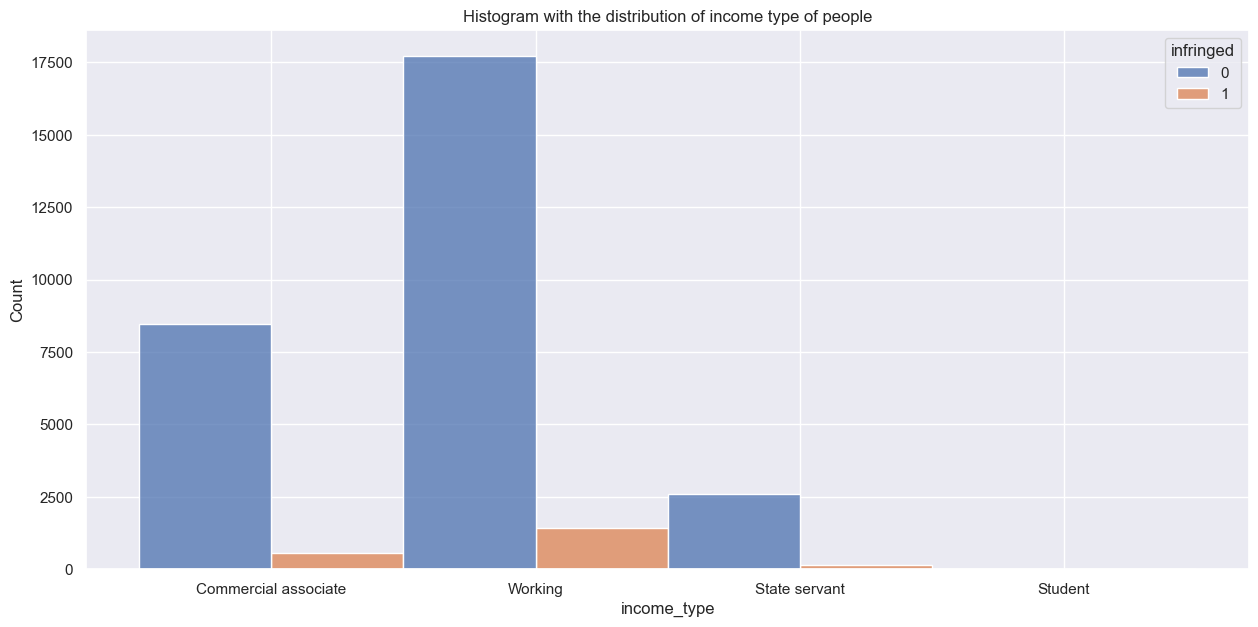

In [66]:
plt.figure(figsize=(15, 7))
sns.set()
sns.histplot(data=data, x='income_type', hue='infringed', multiple="dodge")
plt.title('Histogram with the distribution of income type of people')

Text(0.5, 1.0, 'Histogram with the distribution of education')

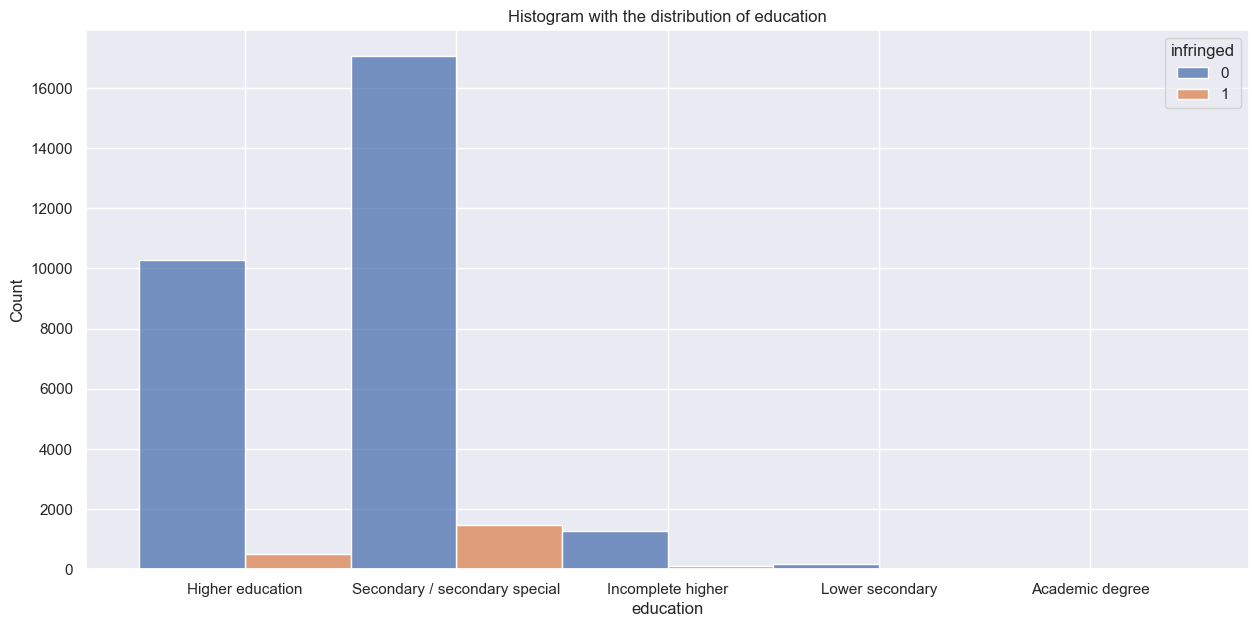

In [74]:
plt.figure(figsize=(15, 7))
sns.set()
sns.histplot(data=data, x='education', hue='infringed', multiple="dodge")
plt.title('Histogram with the distribution of education')

Text(0.5, 1.0, 'Histogram with the distribution of the family status')

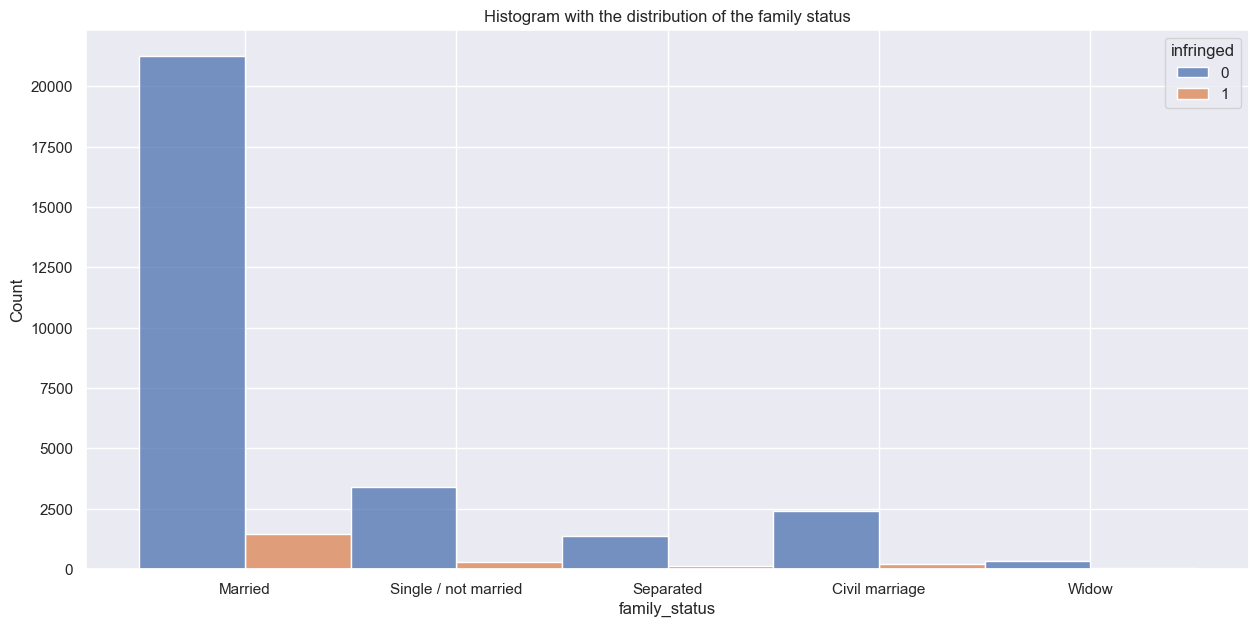

In [73]:
plt.figure(figsize=(15, 7))
sns.set()
sns.histplot(data=data, x='family_status', hue='infringed', multiple="dodge")
plt.title('Histogram with the distribution of the family status')

Text(0.5, 1.0, 'Histogram with the distribution of the number of family members')

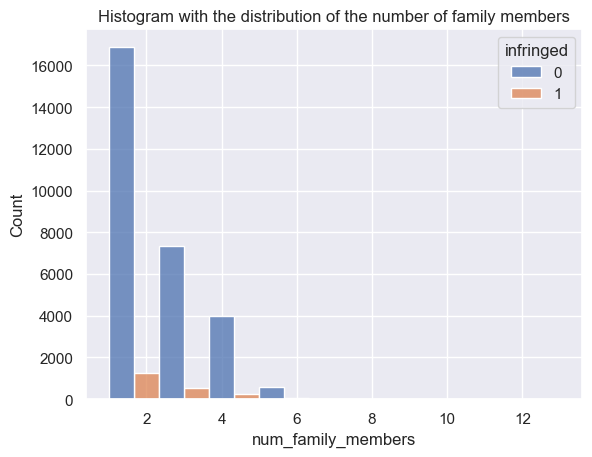

In [71]:
plt.figure()
sns.histplot(data=data, x='num_family_members', hue='infringed', multiple="dodge", bins=9)
plt.title('Histogram with the distribution of the number of family members')

Assim, pode-se concluir que a maioria das pessoas que pedem mais empréstimos pertencem à mesma faixa de pessoas que cometem mais infrações, como já era de esperar.

Também de pode concluir pelos dados obtidos que as pessoas que cometem mais infrações / pedem mais empréstimos pertencem ao profile:-
 - casad@
 - com dois elementos na sua família (ele/a mais outra pessoa)
 - com apenas educação secundária
 - com idade entre os 20-40 anos
 - trabalhador(a)